<a href="https://colab.research.google.com/github/kxtubh/LungCancerPrediction/blob/main/svm_lungcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import all dependencies and dataset

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle


In [4]:
!mv kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json # Sets proper file permissions

In [6]:
!kaggle datasets download -d adityamahimkar/iqothnccd-lung-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset
License(s): copyright-authors


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import time

In [9]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

<ipython-input-9-c75c8f701b44>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


#2. Image preprocessing

In [10]:
file_name = "/content/iqothnccd-lung-cancer-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [11]:
 os.chdir('/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases')
images = []
labels = []

for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      images.append(img)
      labels.append((i[0:1]))


  0%|          | 0/120 [00:00<?, ?it/s]

In [12]:
os.chdir('/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      images.append(img)
      labels.append((i[0:1]))

  0%|          | 0/561 [00:00<?, ?it/s]

In [13]:
os.chdir('/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      images.append(img)
      labels.append((i[0:1]))

  0%|          | 0/416 [00:00<?, ?it/s]

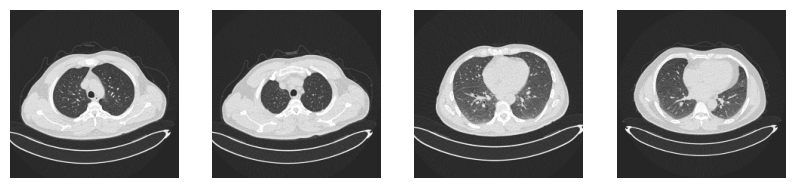

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.axis('off')
plt.show()

#3.Spliting the dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [16]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [17]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)


X_train Shape:  (734, 224, 224, 3)
X_test Shape:  (363, 224, 224, 3)
y_train Shape:  (734, 3)
y_test Shape:  (363, 3)


In [18]:
# After you have loaded and preprocessed your images and labels:
# Flatten the images for SVM input
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # Flatten 224x224x3 to 150528 features
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

In [19]:
# Convert one-hot encoded labels back to single integers for SVM
y_train_svm = np.argmax(y_train, axis=1)
y_test_svm = np.argmax(y_test, axis=1)


In [20]:
# Use StandardScaler to normalize the features
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale', probability=True))


#4. using the pretrained model

In [21]:
svm_model.fit(X_train_flattened, y_train_svm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True))])

#6. Evaluation and Predictions


In [22]:

# Evaluate the model
print("Evaluating SVM model...")
y_pred = svm_model.predict(X_test_flattened)
accuracy = svm_model.score(X_test_flattened, y_test_svm)
print(f"Test Accuracy: {accuracy:.4f}")



Evaluating SVM model...
Test Accuracy: 0.9697


In [23]:
# Print detailed metrics
print("\nClassification Report:")
print(classification_report(y_test_svm, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        49
           1       0.98      1.00      0.99       190
           2       0.94      0.97      0.96       124

    accuracy                           0.97       363
   macro avg       0.97      0.94      0.96       363
weighted avg       0.97      0.97      0.97       363



In [24]:

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_svm, y_pred))



Confusion Matrix:
[[ 42   0   7]
 [  0 190   0]
 [  0   4 120]]


In [25]:
# Function to predict using SVM
def predict_image_svm(image_path, model):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return "Error: Could not load image."

        img = cv2.resize(img, (224, 224))

        # Flatten the image
        img_flattened = img.reshape(1, -1)

        # Make the prediction
        prediction = model.predict_proba(img_flattened)
        predicted_class_index = model.predict(img_flattened)[0]

        # Map the index to a class name
        class_names = ['Benign', 'Malignant', 'Normal']  # Based on your dataset classes
        predicted_class = class_names[predicted_class_index]
        probability = np.max(prediction)

        return f"Predicted class: {predicted_class} (Confidence: {probability:.4f})"

    except Exception as e:
        return f"Error during prediction: {e}"


In [26]:
# Example usage
result = predict_image_svm("/content/Test cases/000001_03_01_088.png", svm_model)
print(result)

Predicted class: Malignant (Confidence: 0.9117)


#7. Visualize

In [27]:
# Optimized Precision-Recall Curve Function
def plot_precision_recall_curve_optimized(model, X_test, y_test, sample_size=None, n_classes=3):
    """
    Plot optimized precision-recall curve for multi-class classification.

    Args:
        model: trained classifier with predict_proba method
        X_test: test features
        y_test: test labels
        sample_size: optional subsample size for faster computation
        n_classes: number of classes
    """
    print("Generating precision-recall curve...")
    start_time = time.time()

    # Use a subset of test data for faster computation
    if sample_size and sample_size < len(X_test):
        indices = np.random.choice(len(X_test), sample_size, replace=False)
        X_test_sample = X_test[indices]
        y_test_sample = y_test[indices]
        print(f"Using {sample_size} random samples from test set...")
    else:
        X_test_sample = X_test
        y_test_sample = y_test
        print("Using full test set...")

    # Binarize the output for multi-class precision-recall
    y_test_bin = label_binarize(y_test_sample, classes=range(n_classes))

    # Get probability predictions - this is typically the bottleneck
    pred_start = time.time()
    y_score = model.predict_proba(X_test_sample)
    print(f"Prediction time: {time.time() - pred_start:.2f} seconds")

    # Calculate precision and recall for each class
    precision = {}
    recall = {}
    avg_precision = {}

    pr_start = time.time()
    class_names = ['Benign', 'Malignant', 'Normal']
    colors = ['blue', 'red', 'green']

    # Create the figure before loop to avoid multiple figure creations
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        avg_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

        # Plot inside the loop to avoid storing large arrays
        plt.plot(recall[i], precision[i], color=colors[i], lw=2,
                 label=f'{class_names[i]} (AP = {avg_precision[i]:0.2f})')

    print(f"PR curve computation time: {time.time() - pr_start:.2f} seconds")

    # Finalize plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision-Recall Curve', fontsize=16)
    plt.legend(loc="best")
    plt.grid(alpha=0.3)

    print(f"Total PR curve generation time: {time.time() - start_time:.2f} seconds")
    plt.show()

    # Return minimal data to save memory
    return avg_precision


In [28]:

# Optimized Learning Curve Function
def plot_learning_curve_optimized(estimator, X, y, title="Learning Curve", cv=3,
                                  n_jobs=-1, train_sizes=np.linspace(.2, 1.0, 5), sample_size=None):
    """
    Plot learning curve with optimization for speed.

    Args:
        estimator: trained model
        X: feature data
        y: target labels
        title: plot title
        cv: number of cross-validation folds (reduced from default 5 to 3)
        n_jobs: number of parallel jobs
        train_sizes: array of training set sizes to evaluate (reduced number of points)
        sample_size: optional subsample size for faster computation
    """
    print("Generating learning curve...")
    start_time = time.time()

    # Sample data if requested
    if sample_size and sample_size < len(X):
        indices = np.random.choice(len(X), sample_size, replace=False)
        X_sample = X[indices]
        y_sample = y[indices]
        print(f"Using {sample_size} samples for learning curve...")
    else:
        X_sample = X
        y_sample = y
        print("Using full dataset for learning curve...")

    # Use fewer training sizes for faster computation
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_sample, y_sample, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='accuracy', verbose=1)

    print(f"Learning curve computation time: {time.time() - start_time:.2f} seconds")

    # Calculate statistics
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.title(title, fontsize=16)
    plt.xlabel("Training examples", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.grid(alpha=0.3)

    # Plot without standard deviation bands for better performance
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best", fontsize=14)
    plt.tight_layout()
    plt.show()

    return train_sizes, train_scores_mean, test_scores_mean


In [29]:

# Optimized Confusion Matrix Function
def plot_confusion_matrix_optimized(y_true, y_pred, class_names):
    """
    Plot an optimized confusion matrix visualization.

    Args:
        y_true: true labels
        y_pred: predicted labels
        class_names: list of class name strings
    """
    print("Generating confusion matrix...")
    start_time = time.time()

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate percentages for annotation
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = f'{c}\n{p:.1f}%'

    # Plot the confusion matrix - simplified visualization
    plt.figure(figsize=(8, 6))

    # Using imshow instead of seaborn for better performance
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.colorbar()

    # Add annotations
    thresh = cm.max() / 2.
    for i in range(nrows):
        for j in range(ncols):
            plt.text(j, i, annot[i, j],
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    # Add labels and ticks
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("True", fontsize=14)
    plt.title("Confusion Matrix", fontsize=16)

    print(f"Confusion matrix generation time: {time.time() - start_time:.2f} seconds")
    plt.tight_layout()
    plt.show()

    return cm


In [30]:

# Optimized Classification Metrics Function
def plot_classification_metrics_optimized(y_true, y_pred, class_names):
    """
    Visualize precision, recall, and F1 score for each class with optimization.

    Args:
        y_true: true labels
        y_pred: predicted labels
        class_names: list of class name strings
    """
    print("Calculating classification metrics...")
    start_time = time.time()

    # Calculate precision, recall, and F1 score for each class (single calculation)
    from sklearn.metrics import precision_recall_fscore_support
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)

    # Calculate overall metrics (single calculation)
    avg_precision, avg_recall, avg_f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='weighted'
    )

    # Simplified plot - use a single plot with grouped bars
    plt.figure(figsize=(12, 7))

    # Set up bar positions
    n_classes = len(class_names)
    index = np.arange(n_classes)
    bar_width = 0.25
    opacity = 0.8

    # Plot bars for each metric
    plt.bar(index, precision, bar_width, alpha=opacity, color='b', label='Precision')
    plt.bar(index + bar_width, recall, bar_width, alpha=opacity, color='g', label='Recall')
    plt.bar(index + 2*bar_width, f1, bar_width, alpha=opacity, color='r', label='F1 Score')

    # Add labels, title, and legend
    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.title('Classification Metrics by Class')
    plt.xticks(index + bar_width, class_names)
    plt.legend()

    # Add overall scores as text
    plt.figtext(0.15, 0.02, f'Overall Precision: {avg_precision:.3f}', fontsize=12)
    plt.figtext(0.45, 0.02, f'Overall Recall: {avg_recall:.3f}', fontsize=12)
    plt.figtext(0.75, 0.02, f'Overall F1: {avg_f1:.3f}', fontsize=12)

    print(f"Classification metrics generation time: {time.time() - start_time:.2f} seconds")
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust for text at bottom
    plt.show()

    # Return dictionary with all metrics
    return {
        'per_class': {
            'precision': precision,
            'recall': recall,
            'f1': f1
        },
        'overall': {
            'precision': avg_precision,
            'recall': avg_recall,
            'f1': avg_f1
        }
    }


In [31]:

# Optimized ROC Curve Function (New addition)
def plot_roc_curve_optimized(model, X_test, y_test, sample_size=None, n_classes=3):
    """
    Plot optimized ROC curve for multi-class classification.

    Args:
        model: trained classifier with predict_proba method
        X_test: test features
        y_test: test labels
        sample_size: optional subsample size for faster computation
        n_classes: number of classes
    """
    print("Generating ROC curve...")
    start_time = time.time()

    # Use a subset of test data for faster computation
    if sample_size and sample_size < len(X_test):
        indices = np.random.choice(len(X_test), sample_size, replace=False)
        X_test_sample = X_test[indices]
        y_test_sample = y_test[indices]
        print(f"Using {sample_size} random samples from test set...")
    else:
        X_test_sample = X_test
        y_test_sample = y_test
        print("Using full test set...")

    # Binarize the output
    y_test_bin = label_binarize(y_test_sample, classes=range(n_classes))

    # Compute ROC curve and ROC area for each class
    pred_start = time.time()
    y_score = model.predict_proba(X_test_sample)
    print(f"Prediction time: {time.time() - pred_start:.2f} seconds")

    # Plot ROC curves
    plt.figure(figsize=(10, 8))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    class_names = ['Benign', 'Malignant', 'Normal']
    colors = ['blue', 'red', 'green']

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot each class ROC curve
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
                 label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

    # Plot diagonal line
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)

    print(f"Total ROC curve generation time: {time.time() - start_time:.2f} seconds")
    plt.show()

    return roc_auc


In [32]:

# Usage examples - Each with recommended sample sizes for a good balance of speed and accuracy

def run_precision_recall_curve(model, X_test_flattened, y_test_svm, sample_size=300):
    """Run precision-recall curve with a reasonable sample size for a medical imaging task"""
    return plot_precision_recall_curve_optimized(
        model, X_test_flattened, y_test_svm,
        sample_size=sample_size
    )


In [33]:

def run_learning_curve(model, X_train_flattened, y_train_svm, sample_size=500):
    """Run learning curve with a reasonable sample size"""
    # Use fewer training sizes for faster computation
    sizes = np.linspace(0.2, 1.0, 4)  # Even fewer points

    return plot_learning_curve_optimized(
        model, X_train_flattened, y_train_svm,
        title="SVM Learning Curve (Optimized)",
        train_sizes=sizes,
        cv=3,  # Use fewer CV folds for speed
        sample_size=sample_size
    )

In [34]:

def run_confusion_matrix(y_test_svm, y_pred):
    """Run confusion matrix (already fast, no subsample needed)"""
    class_names = ['Benign', 'Malignant', 'Normal']
    return plot_confusion_matrix_optimized(y_test_svm, y_pred, class_names)


In [35]:

def run_classification_metrics(y_test_svm, y_pred):
    """Run classification metrics (already fast, no subsample needed)"""
    class_names = ['Benign', 'Malignant', 'Normal']
    return plot_classification_metrics_optimized(y_test_svm, y_pred, class_names)


In [36]:
def run_roc_curve(model, X_test_flattened, y_test_svm, sample_size=300):
    """Run ROC curve with a reasonable sample size"""
    return plot_roc_curve_optimized(
        model, X_test_flattened, y_test_svm,
        sample_size=sample_size
    )

In [37]:

# Example of calling all visualizations sequentially with a main function
def run_all_visualizations(model, X_train_flattened, y_train_svm, X_test_flattened, y_test_svm, y_pred):
    """Run all visualizations with optimized parameters"""
    print("Running all optimized visualizations...")

    # Precision-Recall Curve
    pr_results = run_precision_recall_curve(model, X_test_flattened, y_test_svm, sample_size=300)

    # ROC Curve
    roc_results = run_roc_curve(model, X_test_flattened, y_test_svm, sample_size=300)

    # Learning Curve (most computationally expensive)
    lc_results = run_learning_curve(model, X_train_flattened, y_train_svm, sample_size=500)

    # Confusion Matrix
    cm_results = run_confusion_matrix(y_test_svm, y_pred)

    # Classification Metrics
    metrics_results = run_classification_metrics(y_test_svm, y_pred)

    print("All visualizations completed successfully!")

    return {
        'precision_recall': pr_results,
        'roc': roc_results,
        'learning_curve': lc_results,
        'confusion_matrix': cm_results,
        'classification_metrics': metrics_results
    }

Running all optimized visualizations...
Generating precision-recall curve...
Using 300 random samples from test set...
Prediction time: 58.29 seconds
PR curve computation time: 0.03 seconds
Total PR curve generation time: 58.37 seconds


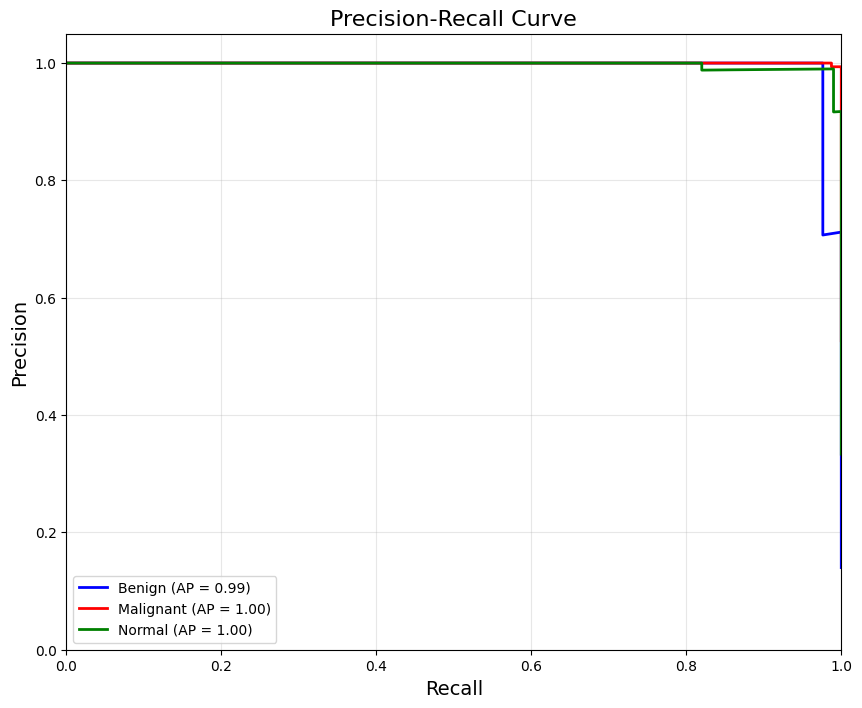

Generating ROC curve...
Using 300 random samples from test set...
Prediction time: 52.15 seconds
Total ROC curve generation time: 52.20 seconds


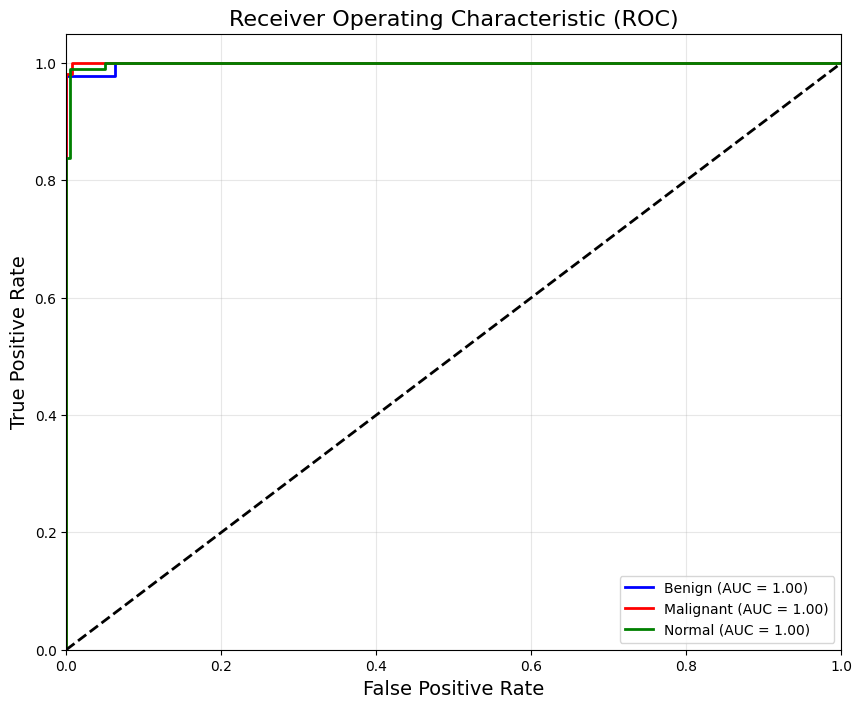

Generating learning curve...
Using 500 samples for learning curve...
[learning_curve] Training set sizes: [ 66 155 244 333]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 14.0min finished


Learning curve computation time: 837.95 seconds


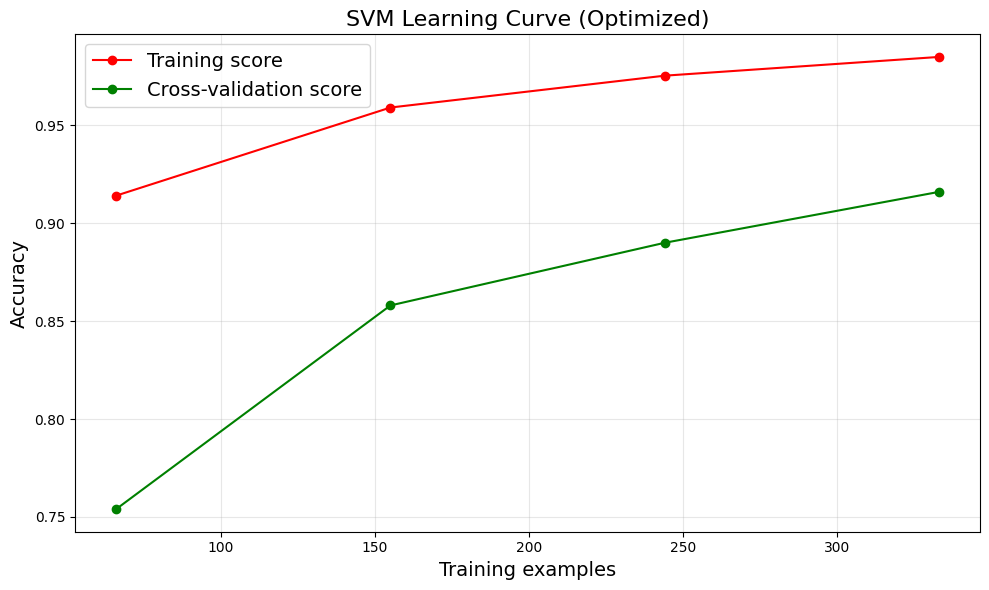

Generating confusion matrix...
Confusion matrix generation time: 0.05 seconds


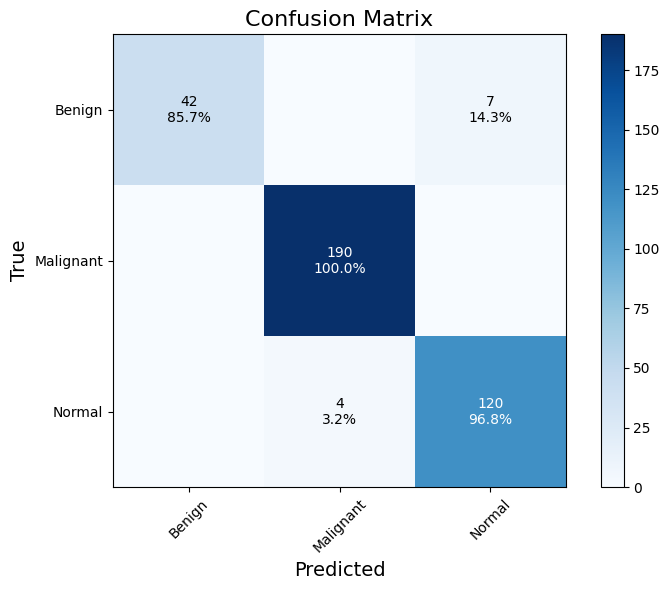

Calculating classification metrics...
Classification metrics generation time: 0.04 seconds


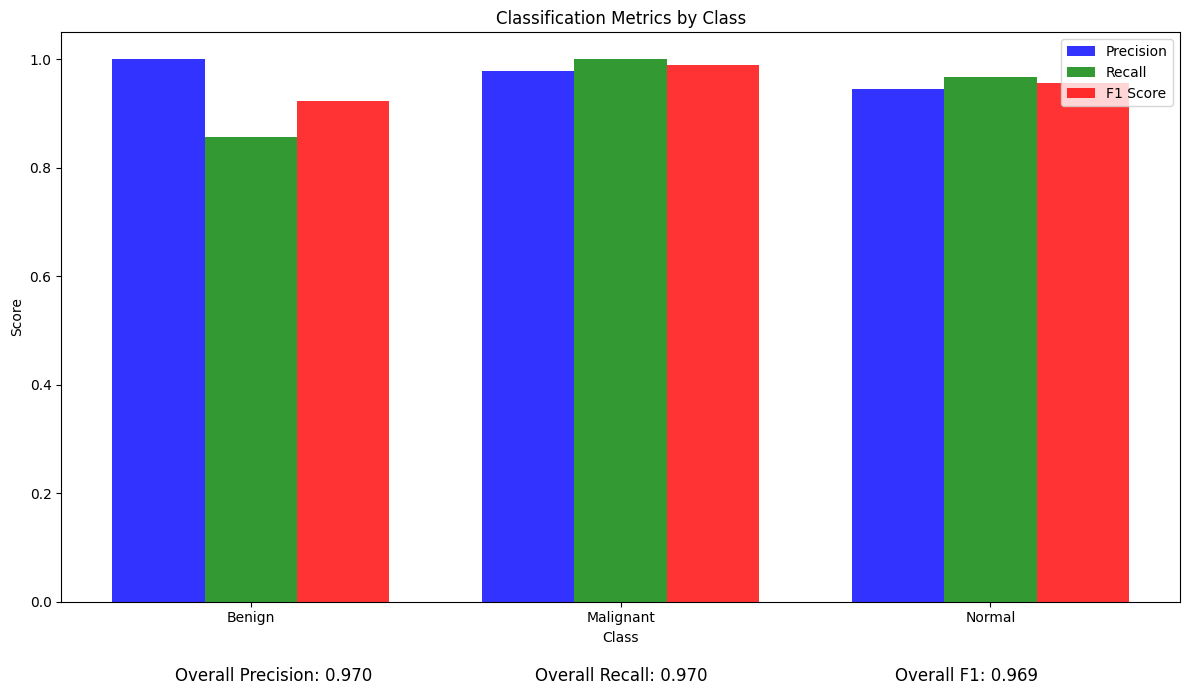

All visualizations completed successfully!


{'precision_recall': {0: np.float64(0.9931396287328492),
  1: np.float64(0.9999201365689865),
  2: np.float64(0.9973212194770109)},
 'roc': {0: np.float64(0.9985795454545454),
  1: np.float64(0.999866375662554),
  2: np.float64(0.9987436554600734)},
 'learning_curve': (array([ 66, 155, 244, 333]),
  array([0.91414141, 0.95913978, 0.97540984, 0.98498498]),
  array([0.75401005, 0.85804295, 0.89005122, 0.91604742])),
 'confusion_matrix': array([[ 42,   0,   7],
        [  0, 190,   0],
        [  0,   4, 120]]),
 'classification_metrics': {'per_class': {'precision': array([1.        , 0.97938144, 0.94488189]),
   'recall': array([0.85714286, 1.        , 0.96774194]),
   'f1': array([0.92307692, 0.98958333, 0.9561753 ])},
  'overall': {'precision': 0.970379692995903,
   'recall': 0.9696969696969697,
   'f1': 0.9691937730465439}}}

In [39]:
run_all_visualizations(svm_model, X_train_flattened, y_train_svm, X_test_flattened, y_test_svm, y_pred)